In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pltHw1
from matplotlib.ticker import MultipleLocator, ScalarFormatter, FuncFormatter

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [90]:
def beauty_derivative_plot(x0):
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    f = lambda x: 2*np.sin(x)-np.cos(2*x)
    df = lambda x: 2*np.cos(x)+2*np.sin(2*x)
    tang = lambda x0, x: f(x0)+df(x0)*(x-x0)
    # print(x.shape, f(x).shape)
    fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
    line1, = ax.plot(x, f(x), label='line1', color = "blue")
    line2, =ax.plot(x, df(x), "r--",label ='line2')
    line3, =ax.plot(x, tang(x0, x), "green",label ='line3')
    hx = np.linspace(0, x0, 500)
    line5, = ax.plot(hx, np.full((500), f(x0)), 'm--')
    line6, = ax.plot(np.full((500), x0), np.linspace(0, f(x0), 500),'m--')
    line4, =ax.plot(x0, f(x0), 'ko')
    ax.axhline(y=0, color='black', linewidth=1) # x axis
    ax.axvline(x=0, color='black', linewidth=1) # y axis
    ax.annotate(f"f'({x0}) = {f(x0):.3f}",xy=(x0, f(x0)),ha='center', xytext=(x0, f(x0)-2), 
                arrowprops=dict(arrowstyle="->", color='black', connectionstyle="arc3,rad=.2")) #adding arrow
    ax.legend((line1, line2, line3), ['f(x) = 2sinx-cos2x', "f'(x) = 2cosx+2sin2x", f"Tangent at x = {x0:.2f}"])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("Function, Derivative, Tangent line")
    ax.set_ylim(-4, 4)
    ax.grid()
    plt.show()


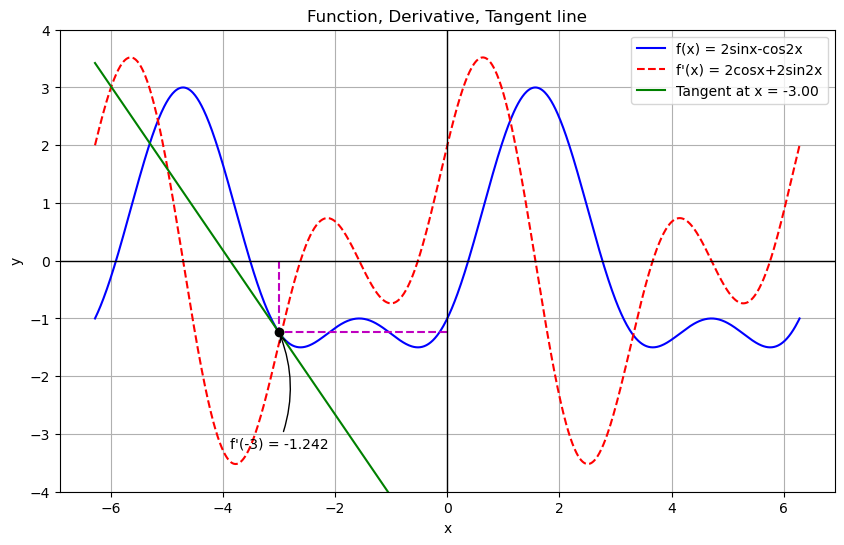

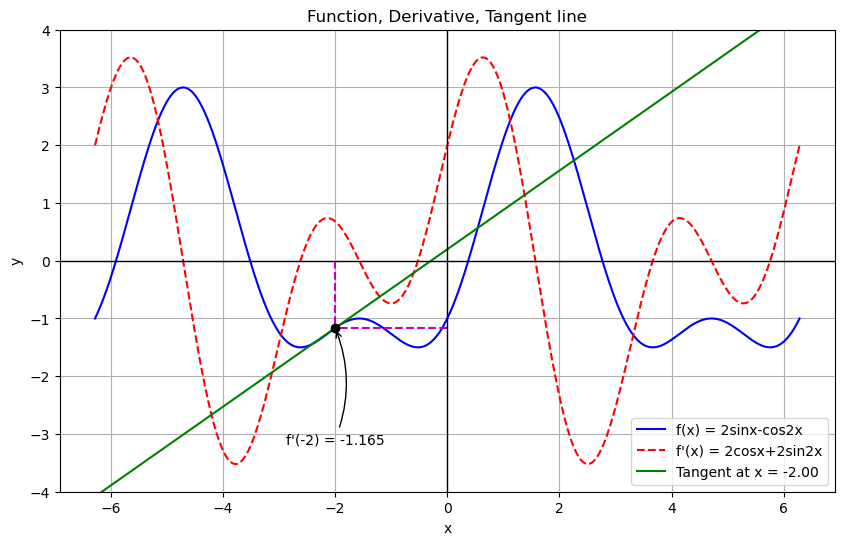

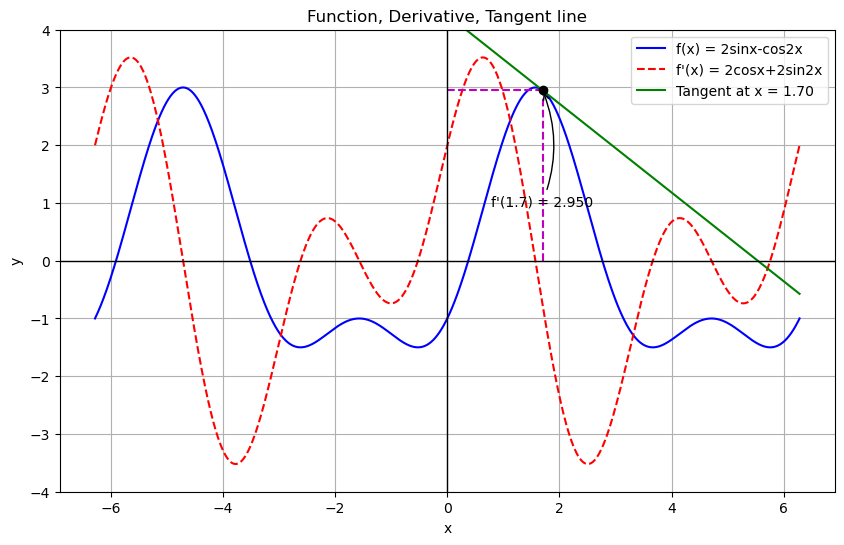

In [3]:
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)


## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [91]:
data = np.loadtxt("populations.txt")
years = data[:, 0].astype('int32')
hares = data[:, 1].astype('int32')
lynxes = data[:, 2].astype('int32')
carrots = data[:, 3].astype('int32')
carrots.dtype

dtype('int32')

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

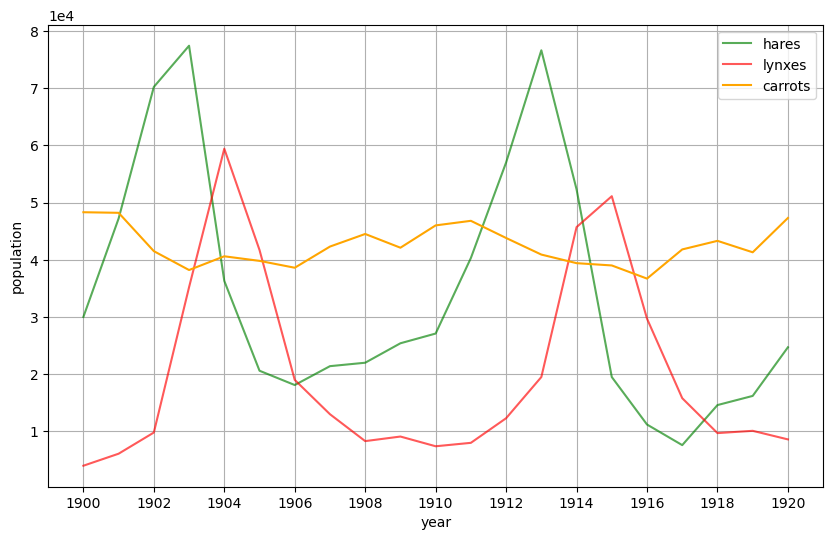

In [92]:
def show_plt(years, hares, lynxes, carrots):
    fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
    line1, = ax.plot(years, hares, label='hares', color = 'green', alpha = 0.65)
    line2, =ax.plot(years, lynxes,label ='lynxes', color = 'r', alpha =0.65)
    line3, =ax.plot(years,carrots ,label ='carrots', color = 'orange')
    ax.set_xlabel('year')
    ax.set_ylabel('population')
    ax.grid()
    sf = ScalarFormatter()
    sf.set_powerlimits((0, 2))
    ax.xaxis.set_major_locator(MultipleLocator(base = 2))
    ax.yaxis.set_major_formatter(sf)
    ax.legend((line1, line2, line3), ['hares', 'lynxes', 'carrots'])
    plt.show()
show_plt(years, hares, lynxes, carrots)

- Find which year each species had the largest population. Mark these years in the plot of populations.

In [93]:
max_hares_year = years[np.argmax(hares)]
max_lynxes_year = years[np.argmax(lynxes)]
max_carrots_year = years[np.argmax(carrots)]
print(f"max_hares_year:{max_hares_year}, max_lynxes_year:{max_lynxes_year}, max_carrots_year:{max_carrots_year}")

max_hares_year:1903, max_lynxes_year:1904, max_carrots_year:1900


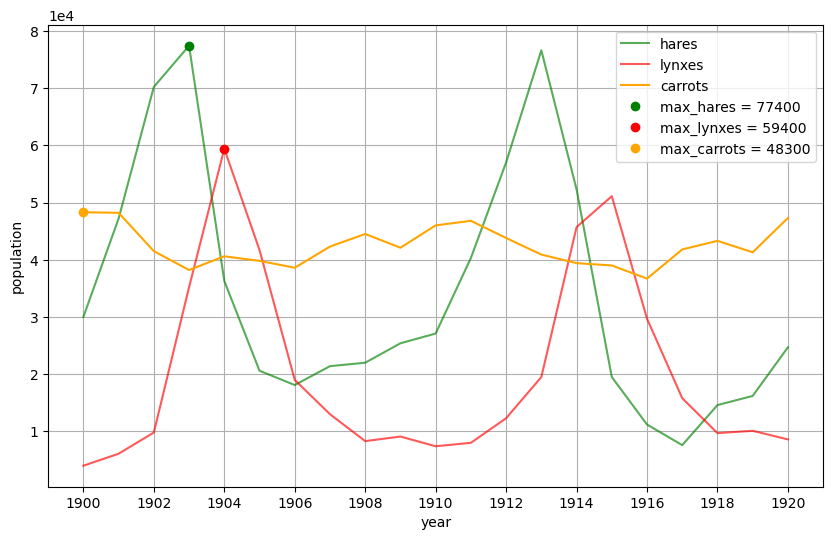

In [94]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
line1, = ax.plot(years, hares, label='hares', color = 'green', alpha = 0.65)
line2, =ax.plot(years, lynxes,label ='lynxes', color = 'r', alpha =0.65)
line3, =ax.plot(years,carrots ,label ='carrots', color = 'orange')
point1 = ax.plot(max_hares_year, np.max(hares), 'go', label = f"max_hares = {np.max(hares)}")
point2 = ax.plot(max_lynxes_year, np.max(lynxes), 'ro', label =f"max_lynxes = {np.max(lynxes)}")
point3 = ax.plot(max_carrots_year, np.max(carrots), 'o', color = 'orange',label = f"max_carrots = {np.max(carrots)}")
ax.legend(loc='upper right')

ax.set_xlabel('year')
ax.set_ylabel('population')
ax.grid()
sf = ScalarFormatter()
sf.set_powerlimits((0, 2))
ax.xaxis.set_major_locator(MultipleLocator(base = 2))
ax.yaxis.set_major_formatter(sf)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

In [95]:
hares_ratio = hares/(hares+lynxes)
lynxes_ratio = lynxes/(hares+lynxes)
hares_ratio, lynxes_ratio

(array([0.88235294, 0.88555347, 0.8775    , 0.68738899, 0.37931034,
        0.33065811, 0.48787062, 0.62209302, 0.72607261, 0.73623188,
        0.78550725, 0.83436853, 0.82251082, 0.79708637, 0.53367347,
        0.27620397, 0.27383863, 0.32478632, 0.60082305, 0.61596958,
        0.74174174]),
 array([0.11764706, 0.11444653, 0.1225    , 0.31261101, 0.62068966,
        0.66934189, 0.51212938, 0.37790698, 0.27392739, 0.26376812,
        0.21449275, 0.16563147, 0.17748918, 0.20291363, 0.46632653,
        0.72379603, 0.72616137, 0.67521368, 0.39917695, 0.38403042,
        0.25825826]))

Text(0.5, 1.0, 'Stack bar graph showing ratio of hares and lynxes')

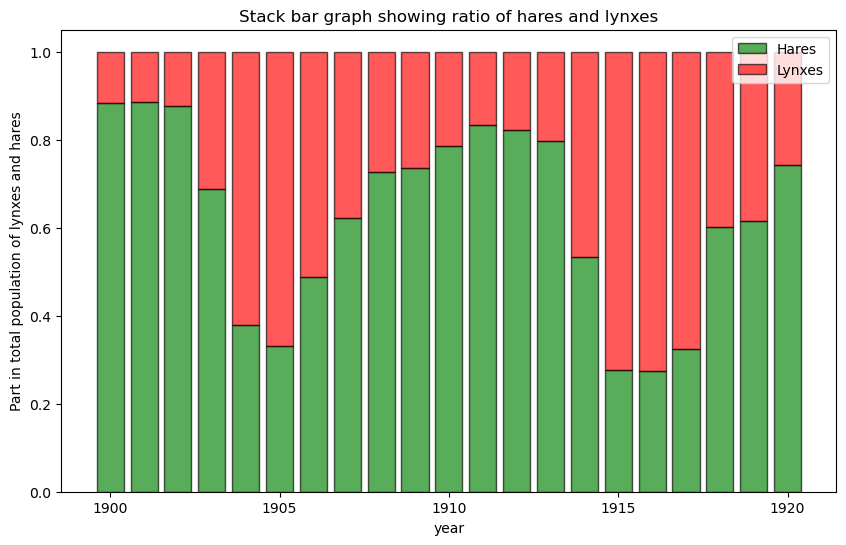

In [96]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
p1 = ax.bar(years, hares_ratio, label ='Hares', color= 'green', alpha =0.65, edgecolor = 'black')
p2 = ax.bar(years, lynxes_ratio, label ='Lynxes', color = 'red', bottom = hares_ratio, alpha = 0.65, edgecolor = 'black')
ax.set_xlabel('year')
ax.legend(loc='upper right')
ax.set_ylabel('Part in total population of lynxes and hares')
ax.set_title('Stack bar graph showing ratio of hares and lynxes')

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

In [97]:
hares_mean, hares_std = np.mean(hares), np.std(hares)
lynxes_mean, lynxes_std = np.mean(lynxes), np.std(lynxes)
carrots_mean, carrots_std = np.mean(carrots), np.std(carrots)
print(f"hares_mean: {hares_mean}, hares_std: {hares_std}")
print(f"lynxes_mean: {lynxes_mean}, hares_std: {lynxes_std}")
print(f"carrots_mean: {carrots_mean}, carrots_std: {carrots_std}")

hares_mean: 34080.95238095238, hares_std: 20897.906458089667
lynxes_mean: 20166.666666666668, hares_std: 16254.591536908763
carrots_mean: 42400.0, carrots_std: 3322.5062255844787


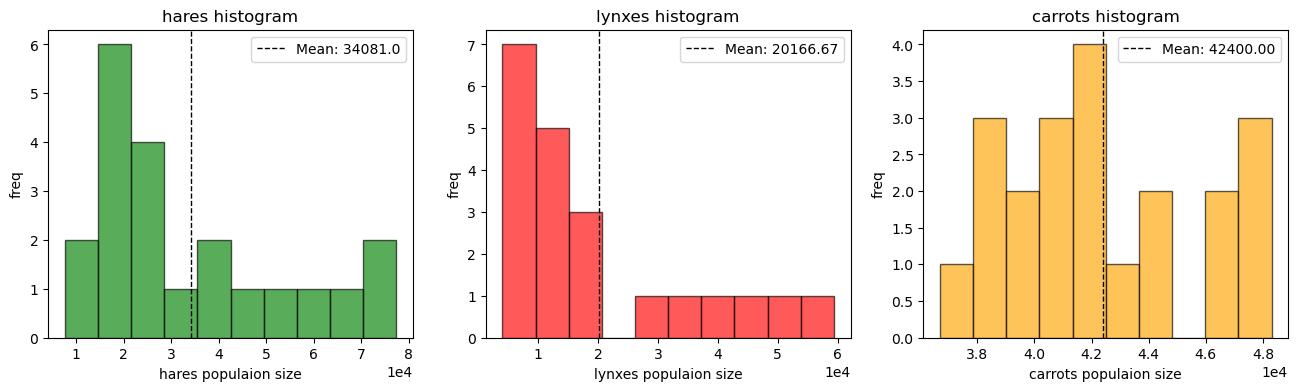

In [98]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))
hares_hist = ax0.hist(hares, bins = 10, color = 'green', edgecolor ='black', alpha = 0.65)
ax0.set_title("hares histogram")
ax0.axvline(hares_mean, color='black', linestyle='dashed', linewidth=1,label=f'Mean: {hares_mean:.1f}')
ax0.set_xlabel('hares populaion size')
ax0.set_ylabel('freq')
sf0 = ScalarFormatter()
sf0.set_powerlimits((0, 2))
ax0.xaxis.set_major_formatter(sf0)
ax0.legend()
hares_hist = ax1.hist(lynxes, bins = 10, color = 'red', edgecolor ='black', alpha = 0.65)
ax1.set_title("lynxes histogram")
ax1.axvline(lynxes_mean, color='black', linestyle='dashed', linewidth=1,label=f'Mean: {lynxes_mean:.2f}')
ax1.set_xlabel('lynxes populaion size')
ax1.set_ylabel('freq')
sf1 = ScalarFormatter()
sf1.set_powerlimits((0, 2))
ax1.xaxis.set_major_formatter(sf1)
ax1.legend()
carrots_hist = ax2.hist(carrots, bins = 10, color = 'orange', edgecolor ='black', alpha = 0.65)
ax2.set_title("carrots histogram")
ax2.axvline(carrots_mean, color='black', linestyle='dashed', linewidth=1,label=f'Mean: {carrots_mean:.2f}')
ax2.set_xlabel('carrots populaion size')
ax2.set_ylabel('freq')
sf2 = ScalarFormatter()
sf2.set_powerlimits((0, 2))
ax2.xaxis.set_major_formatter(sf2)
ax2.legend()
None

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

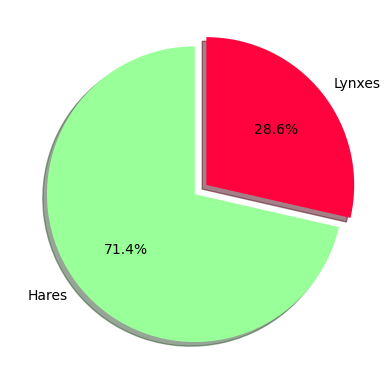

In [99]:
larger_popul = np.where(hares >= lynxes, 'H', 'L')
fig, ax = plt.subplots()
larger_popul[larger_popul =='H'].size, larger_popul[larger_popul =='L'].size
ax.pie((larger_popul[larger_popul =='H'].size, larger_popul[larger_popul =='L'].size), labels=['Hares', 'Lynxes'], 
       colors = ['#99FF99', '#ff033e'], autopct='%1.1f%%',
       shadow=True, startangle=90, explode = (0, 0.1)
       )
None

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

In [100]:
difHares = np.ediff1d(hares, to_begin=0)
difLynxes = np.ediff1d(lynxes, to_begin =0)
difHares, difLynxes

(array([     0,  17200,  23000,   7200, -41100, -15700,  -2500,   3300,
           600,   3400,   1700,  13200,  16700,  19600, -24300, -32800,
         -8300,  -3600,   7000,   1600,   8500], dtype=int32),
 array([     0,   2100,   3700,  25400,  24200, -17700, -22700,  -6000,
         -4700,    800,  -1700,    600,   4300,   7200,  26200,   5400,
        -21400, -13900,  -6100,    400,  -1500], dtype=int32))

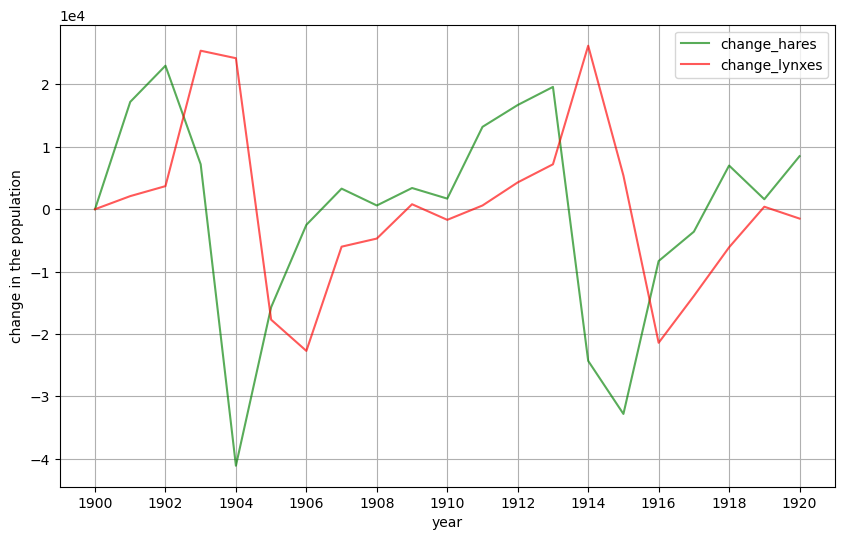

In [101]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
line1, = ax.plot(years, difHares, label='change_hares', color = 'green', alpha = 0.65)
line2, =ax.plot(years, difLynxes,label ='change_lynxes', color = 'r', alpha =0.65)
ax.set_xlabel('year')
ax.set_ylabel('change in the population')
ax.grid()
sf = ScalarFormatter()
sf.set_powerlimits((0, 2))
ax.xaxis.set_major_locator(MultipleLocator(base = 2))
ax.yaxis.set_major_formatter(sf)
ax.legend()
None

Correlation between difference of hares and difference of lynxes:

In [103]:
corr_coef = np.corrcoef(difHares, difLynxes)
print(f"Correlation = {corr_coef[1][0]:.4f}")

Correlation = -0.1780


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

Text(0.5, 1.0, 'Hares vs Lynxes scatter plot')

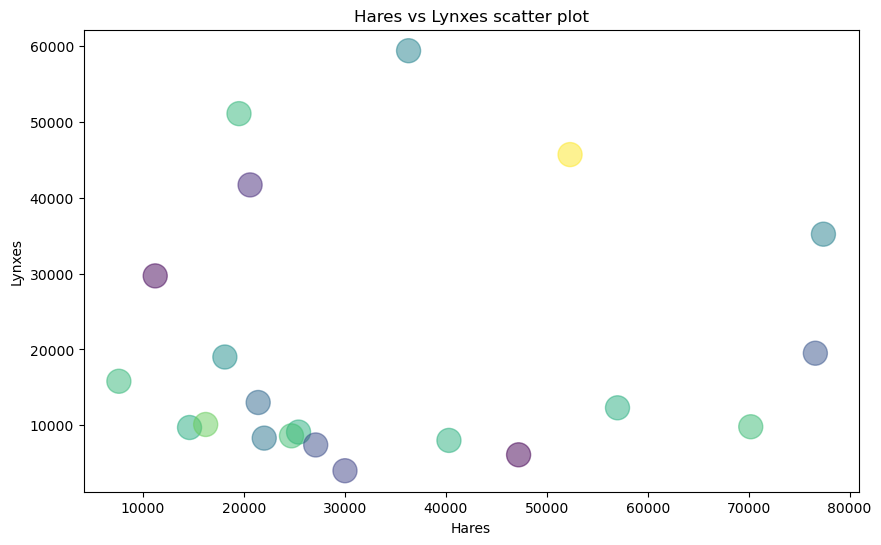

In [104]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
N = hares.size
colors = np.random.rand(N)
area =300
p1 = ax.scatter(hares, lynxes, s=area, c=colors, alpha=0.5)
ax.set_xlabel('Hares')
ax.set_ylabel('Lynxes')
ax.set_title('Hares vs Lynxes scatter plot')

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
import pandas as pd
import 